In [1]:
# import necessary modules
import os
import pandas as pd
from rdkit import Chem
import rdkit.Chem.rdFreeSASA as FreeSASA
from pymol import cmd

import multiprocessing as mp

In [120]:
# Defined constants:
PATH_TO_BASE_FOLDER = '/home/fol007/PycharmProjects/ChEMBL_plus_BindingMOAD/BindingMOAD_AstexDiverseSet_Simplified' #'/BindingMOAD_AstexDiverseSet_Simplified'
PATH_TO_PDB_FOLDER = f'{PATH_TO_BASE_FOLDER}/pdb_files'
PATH_TO_REFERENCE_LIGANDS_FOLDER = f'{PATH_TO_BASE_FOLDER}/reference_ligands'

In [122]:
def create_reference_dictionary(path_to_reference_ligands_folder=PATH_TO_REFERENCE_LIGANDS_FOLDER):
    '''organize dictionary based on the reference ligands'''
    reference_dictionary = {}
    uniprot_ids = os.listdir(path_to_reference_ligands_folder)
    for uniprot_id in uniprot_ids:
        reference_dictionary[uniprot_id] = []
        for references in os.listdir(path_to_reference_ligands_folder + '/' + uniprot_id):
            reference_dictionary[uniprot_id] += [references]
    return reference_dictionary

{'P16083': ['3OVM_MZC.sdf',
  '3G5M_XM5.sdf',
  '3OWH_52X.sdf',
  '3GAM_MXX.sdf',
  '4GQI_M49.sdf',
  '5LBW_V0L.sdf',
  '3OX3_4X4.sdf',
  '2QWX_ML1.sdf',
  '4ZVM_DM2.sdf',
  '3FW1_STI.sdf',
  '5LBY_6T2.sdf',
  '3OWX_XRA.sdf',
  '1XI2_CB1.sdf',
  '3OX2_79X.sdf',
  '2QX8_ML2.sdf',
  '3TE7_TE7.sdf',
  '5LBZ_6T3.sdf',
  '5LBY_FAD.sdf',
  '1SG0_STL.sdf'],
 'P47811': ['3P78_P78.sdf',
  '3P79_P79.sdf',
  '4LOO_SB4.sdf',
  '3P7C_P7C.sdf',
  '3P7A_P7A.sdf',
  '2GTN_LIE.sdf',
  '2GTM_LID.sdf',
  '2EWA_SB2.sdf',
  '3P7B_P7B.sdf',
  '3P5K_P5K.sdf'],
 'Q08499': ['6INK_AKU.sdf',
  '1ZKN_IBM.sdf',
  '5LBO_6M5.sdf',
  '6HWO_FFZ.sdf',
  '2FM0_M98.sdf',
  '6F8V_D0B.sdf',
  '6IMO_AJL.sdf',
  '1XOQ_ROF.sdf',
  '6FDC_D5N.sdf',
  '1XON_PIL.sdf',
  '1Y2D_4DE.sdf',
  '4WCU_3KQ.sdf',
  '6IMD_AH9.sdf',
  '1TBB_ROL.sdf',
  '2FM5_M99.sdf',
  '1Y2C_3DE.sdf',
  '6IM6_AH3.sdf',
  '1Y2B_DEE.sdf',
  '6IMI_AH6.sdf',
  '6F8U_CZQ.sdf',
  '1XOR_ZAR.sdf',
  '5WQA_J20.sdf',
  '6FDC_DD5.sdf',
  '6IMR_AJX.sdf',
  '2QYN_NPV.sd

In [215]:
reference_dictionary = create_reference_dictionary()

dictionary_df = {'uniprot_id':[], 'reference':[]}

for uniprot_id in reference_dictionary:
    for ref in reference_dictionary[uniprot_id]:
        dictionary_df['uniprot_id'] += [uniprot_id]
        dictionary_df['reference'] += [ref.split('.')[0]]

dictionary_df = pd.DataFrame(dictionary_df)

dictionary_df['sasa_bond_polar'] = None
dictionary_df['sasa_bond_apolar'] = None
dictionary_df['sasa_unbond_polar'] = None
dictionary_df['sasa_unbond_apolar'] = None
dictionary_df['error'] = None

dictionary_df.head(3)

,uniprot_id,reference,sasa_bond_polar,sasa_bond_apolar,sasa_unbond_polar,sasa_unbond_apolar,error
0,P16083,3OVM_MZC,None,None,None,None,None
1,P16083,3G5M_XM5,None,None,None,None,None
2,P16083,3OWH_52X,None,None,None,None,None


In [216]:
work = []
#i = 0
for index, uniprot_id, ref in dictionary_df[['uniprot_id', 'reference']].itertuples():

    path_to_mol = PATH_TO_REFERENCE_LIGANDS_FOLDER + '/' + uniprot_id + '/' + ref + '.sdf'
    path_to_pdb = PATH_TO_PDB_FOLDER + '/' + uniprot_id + '/' + ref.split('_')[0] + '.pdb'

    work += [(index, path_to_mol, path_to_pdb)]

    #i += 1
    #if i ==10:
    #    break

print(len(work))

# Get process results from the output queue
pool = mp.Pool(processes=5)
results = pool.starmap(run_in_parallel, work)
print(len(results))

for index, sasa_bond_apolar, sasa_bond_polar, sasa_unbond_apolar, sasa_unbond_polar, error in results:
    dictionary_df.at[index, 'sasa_bond_apolar'] = sasa_bond_apolar
    dictionary_df.at[index, 'sasa_bond_polar'] = sasa_bond_polar
    dictionary_df.at[index, 'sasa_unbond_apolar'] = sasa_unbond_apolar
    dictionary_df.at[index, 'sasa_unbond_polar'] = sasa_unbond_polar
    dictionary_df.at[index, 'error'] = error

dictionary_df.to_csv('dictionary.csv', index=False)

2046
2046


Process ForkPoolWorker-29:
Process ForkPoolWorker-30:
Process ForkPoolWorker-28:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-27:
Traceback (most recent call last):
  File "/home/fol007/anaconda3/envs/py37_rdkit/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkPoolWorker-26:
  File "/home/fol007/anaconda3/envs/py37_rdkit/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/fol007/anaconda3/envs/py37_rdkit/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/fol007/anaconda3/envs/py37_rdkit/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/fol007/anaconda3/envs/py37_rdkit/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):

In [217]:
dictionary_df.loc[dictionary_df['error']!=-1]

,uniprot_id,reference,sasa_bond_polar,sasa_bond_apolar,sasa_unbond_polar,sasa_unbond_apolar,error
76,P00742,1NFU_RRP,None,None,None,None,'SASA_bonded'
246,P28720,1K4H_APQ,None,None,None,None,'SASA_bonded'
1796,P03372,6IAR_H8W,None,None,None,None,'NoneType' object has no attribute 'GetAtoms'


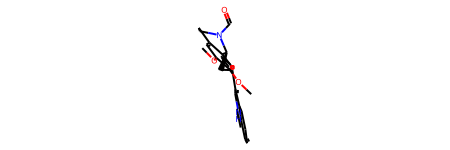

In [2]:
# Get the path to the reference mol:
path_to_mol = '/home/fol007/PycharmProjects/ChEMBL_plus_BindingMOAD/BindingMOAD_AstexDiverseSet_Simplified/reference_ligands/Q08499/6INK_AKU.sdf'
# Get mol reference molecule:
mol = Chem.SDMolSupplier(path_to_mol)[0]
mol_conf = mol.GetConformer()
mol

In [4]:
# Function to classify atoms as polar or apolar
def classifyAtoms(mol, polar_atoms=[7,8,15,16]):
    # the polar atoms are [N,O,S,P]
    # Get Van der Waals radii (angstrom)
    ptable = Chem.GetPeriodicTable()
    radii = [ptable.GetRvdw(atom.GetAtomicNum()) for atom in mol.GetAtoms()]

    for atom in mol.GetAtoms():
        atom.SetProp("SASAClassName", "Apolar") # mark everything as apolar to start
        if atom.GetAtomicNum() in polar_atoms: #identify polar atoms and change their marking
            atom.SetProp("SASAClassName", "Polar") # mark as polar
        elif atom.GetAtomicNum() == 1:
            try:
                if atom.GetBonds()[0].GetOtherAtom(atom).GetAtomicNum() in polar_atoms:
                    atom.SetProp("SASAClassName", "Polar") # mark as polar
            except:
                continue

    return radii

In [5]:
# First I am going to calculate the SASA of the free molecule
radii = classifyAtoms(mol)
FreeSASA.CalcSASA(mol, radii)

563.7467033397826

In [6]:
# Now it is possible to calculate the polar atoms SASA and the apolar atoms SASA of the unbond mol
atoms_mol = mol.GetAtoms()
#for i in range(len(atoms_mol)):
    #print(atoms_mol[i].GetSymbol(), atoms_mol[i].GetProp('SASAClassName'), atoms_mol[i].GetProp("SASA"))
print('')
print('polar', sum(float(a.GetProp("SASA")) for a in atoms_mol if a.GetProp("SASAClassName")=='Polar'))
print('apolar', sum(float(a.GetProp("SASA")) for a in atoms_mol if a.GetProp("SASAClassName")=='Apolar'))
print('total', sum(float(a.GetProp("SASA")) for a in atoms_mol))


polar 111.59908032264022
apolar 452.1476230171424
total 563.7467033397826


In [7]:
# Use pymol to obtain the bond ligand and the surrounding residues (minus the waters)
# Get the path to the corresponding .pdb file
path_to_pdb = '/home/fol007/PycharmProjects/ChEMBL_plus_BindingMOAD/BindingMOAD_AstexDiverseSet_Simplified/pdb_files/Q08499/6INK.pdb'

cmd.load(path_to_mol, object='mol')
cmd.load(path_to_pdb, object='pdb')

cmd.remove(selection='resn hoh')

cmd.select(name='bonded_mol', selection='br. pdb within 6.5 of mol')

cmd.save(filename='bonded_mol.pdb', selection='bonded_mol')

cmd.reinitialize()

 PyMOL not running, entering library mode (experimental)


In [8]:
# Calculate polar and apolar SASA of bonded mol
bonded_mol = Chem.MolFromPDBFile('bonded_mol.pdb')

In [9]:
# Calculate SASA of the bonded mol
radii=classifyAtoms(bonded_mol)
FreeSASA.CalcSASA(bonded_mol, radii)

atoms_bonded = bonded_mol.GetAtoms()
bonded_conf = bonded_mol.GetConformer()

for i in range(len(atoms_bonded)):

    coords_bonded = (bonded_conf.GetAtomPosition(i).x, bonded_conf.GetAtomPosition(i).y, bonded_conf.GetAtomPosition(i).z)

    for j in range(len(atoms_mol)):

        coords_mol = (mol_conf.GetAtomPosition(j).x, mol_conf.GetAtomPosition(j).y, mol_conf.GetAtomPosition(j).z)

        if coords_bonded == coords_mol:
            atoms_mol[j].SetProp("SASA_bonded", atoms_bonded[i].GetProp("SASA"))

print('total', sum(float(a.GetProp("SASA_bonded")) for a in atoms_mol))
print('polar', sum(float(a.GetProp("SASA_bonded")) for a in atoms_mol if a.GetProp("SASAClassName")=='Polar'))
print('apolar', sum(float(a.GetProp("SASA_bonded")) for a in atoms_mol if a.GetProp("SASAClassName")=='Apolar'))

total 130.04866440595518
polar 41.68890659213129
apolar 88.3597578138239


In [12]:
import json

atom_properties = []
for i in range(len(atoms_mol)):

    atom_properties += [{'SASAClassName' : atoms_mol[i].GetProp('SASAClassName'),
                         'SASA' : atoms_mol[i].GetProp('SASA'),
                         'SASA_bonded' : atoms_mol[i].GetProp('SASA_bonded')}]

with open('atom_properties.json', 'w') as outfile:
    json.dump(atom_properties, outfile, indent=4)

In [ ]:
def calculate_sasa(path_to_mol, path_to_pdb):

    # Get mol of molecule:
    mol = Chem.SDMolSupplier(path_to_mol)[0]
    # Get mol atoms
    mol_atoms = mol.GetAtoms()
    # Get conformer of mol
    mol_conf = mol.GetConformer()

    # First I am going to calculate the SASA of the unbond molecule
    radii = classifyAtoms(mol)
    FreeSASA.CalcSASA(mol, radii)

    sasa_unbond_polar = sum(float(a.GetProp("SASA")) for a in mol_atoms if a.GetProp("SASAClassName")=='Polar')
    sasa_unbond_apolar = sum(float(a.GetProp("SASA")) for a in mol_atoms if a.GetProp("SASAClassName")=='Apolar')

    # Use pymol to obtain the bond ligand and the surrounding residues (minus the waters)
    cmd.load(path_to_mol, object='mol')
    cmd.load(path_to_pdb, object='pdb')

    cmd.remove(selection='resn hoh')

    cmd.select(name='bonded_mol', selection='br. pdb within 6.5 of mol')

    bonded_mol_path = path_to_mol.split('/')[-1]+'.pdb'
    cmd.save(filename=bonded_mol_path, selection='bonded_mol')

    cmd.reinitialize()

    bonded_mol = Chem.MolFromPDBFile(bonded_mol_path, sanitize=False)
    os.remove(bonded_mol_path)

    # Get mol atoms
    bonded_mol_atoms = bonded_mol.GetAtoms()
    # Get conformer of mol
    bonded_mol_conf = bonded_mol.GetConformer()

    # Calculate SASA of the bonded mol
    radii=classifyAtoms(bonded_mol)
    FreeSASA.CalcSASA(bonded_mol, radii)

    for i in range(len(bonded_mol_atoms)):

        coords_bonded = (bonded_mol_conf.GetAtomPosition(i).x,
                         bonded_mol_conf.GetAtomPosition(i).y,
                         bonded_mol_conf.GetAtomPosition(i).z)

        for j in range(len(mol_atoms)):

            coords_mol = (mol_conf.GetAtomPosition(j).x, mol_conf.GetAtomPosition(j).y, mol_conf.GetAtomPosition(j).z)

            if coords_bonded == coords_mol:

                mol_atoms[j].SetProp("SASA_bonded", bonded_mol_atoms[i].GetProp("SASA"))

    sasa_bond_polar = sum(float(a.GetProp("SASA_bonded")) for a in mol_atoms if a.GetProp("SASAClassName")=='Polar')
    sasa_bond_apolar = sum(float(a.GetProp("SASA_bonded")) for a in mol_atoms if a.GetProp("SASAClassName")=='Apolar')

    return sasa_bond_apolar, sasa_bond_polar, sasa_unbond_apolar, sasa_unbond_polar

In [181]:
def run_in_parallel(index, path_to_mol, path_to_pdb):
    try:
        sasa_bond_apolar, sasa_bond_polar, sasa_unbond_apolar, sasa_unbond_polar = calculate_sasa(path_to_mol, path_to_pdb)
        error = -1
    except Exception as e:
        sasa_bond_apolar, sasa_bond_polar, sasa_unbond_apolar, sasa_unbond_polar = None, None, None, None
        error = e
    return (index, sasa_bond_apolar, sasa_bond_polar, sasa_unbond_apolar, sasa_unbond_polar, error)
